Ex1: Template Matching in practical

Ảnh gốc: (800, 1290) Template: (226, 95)


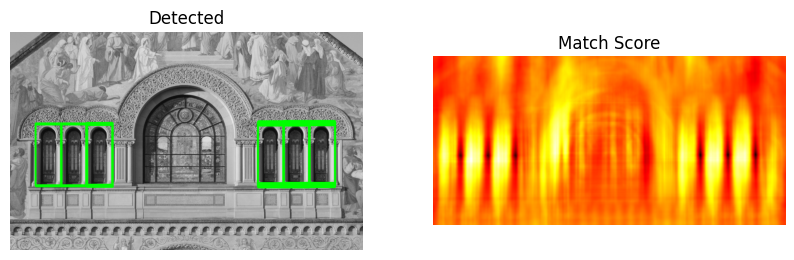

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1) Đọc ảnh
img = cv2.imread('church.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('window.png', cv2.IMREAD_GRAYSCALE)
assert img is not None and template is not None, "Không load được ảnh hoặc template!"
h, w = template.shape

# 2) Đảm bảo template nhỏ hơn ảnh
print("Ảnh gốc:", img.shape, "Template:", template.shape)
assert h <= img.shape[0] and w <= img.shape[1]

# 3) Chọn phương pháp match, với TM_SQDIFF_NORMED kết quả nhỏ hơn là match tốt
result = cv2.matchTemplate(img, template, cv2.TM_SQDIFF_NORMED)

# 4) Ngưỡng: với SQDIFF càng gần 0 càng tốt
threshold = 0.1
# np.where trả về (row_idxs, col_idxs)
row_idxs, col_idxs = np.where(result <= threshold)

# 5) Vẽ rectangle: lưu ý thứ tự (x,y) = (col, row)
out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for y, x in zip(row_idxs, col_idxs):
    top_left     = (x, y)
    bottom_right = (x + w, y + h)
    cv2.rectangle(out, top_left, bottom_right, (0,255,0), 2)

# 6) Hiển thị
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(out[..., ::-1])   # BGR->RGB
plt.title("Detected")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(result, cmap='hot')
plt.title("Match Score")
plt.axis('off')
plt.show()
